# Prodigy InfoTech
## Machine Learning Internship Task

### Task-1: Implement a linear regression model to predict the prices of houses based on their square footage and the number of bedrooms and bathrooms.
### by: Deepank Tyagi

In [234]:
import numpy as np                                  #importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [235]:
df= pd.read_csv("house_prices_test.csv")       # importing data into a pandas dataframe df

In [236]:
df.shape                                     # getting the size of the data

(1459, 80)

In [237]:
df.head(5)                                     # getting initial 5 rows of data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [238]:
df.columns                      #getting columns from the dataset

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [239]:
#reading the description to extract the required attributes (Id,LotArea,BedroomAbvGr,FullBath,HalfBath,TotRmsAbvGrd,SalePrice)
file=open('data_description.txt','r')
print(file.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [240]:
dfc=df.loc[:,["Id","LotArea","BedroomAbvGr","FullBath","HalfBath","TotRmsAbvGrd"]]

In [241]:
dfc.shape

(1459, 6)

In [243]:
dfc["TotalBath"]=dfc["FullBath"]+dfc["HalfBath"]

In [244]:
dfc.shape

(1459, 7)

In [245]:
dfc.head()

,Id,LotArea,BedroomAbvGr,FullBath,HalfBath,TotRmsAbvGrd,TotalBath
0,1461,11622,2,1,0,5,1
1,1462,14267,3,1,1,6,2
2,1463,13830,3,2,1,6,3
3,1464,9978,3,2,1,7,3
4,1465,5005,2,2,0,5,2


In [246]:
#deleting the extra columns
del dfc["FullBath"]
del dfc["HalfBath"]

In [247]:
#getting the dependent variable
dep_var=pd.read_csv("sample_submission.csv")

In [248]:
dep_var.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [249]:
dfc["SalePrice"]=dep_var["SalePrice"]            #adding dependent variable to the dataset

In [250]:
dfc.head()

,Id,LotArea,BedroomAbvGr,TotRmsAbvGrd,TotalBath,SalePrice
0,1461,11622,2,5,1,169277.052498
1,1462,14267,3,6,2,187758.393989
2,1463,13830,3,6,3,183583.683570
3,1464,9978,3,7,3,179317.477511
4,1465,5005,2,5,2,150730.079977


In [251]:
dfc.shape

(1459, 6)

In [252]:
# Data Cleaning
dfc.isnull().sum()

Id              0
LotArea         0
BedroomAbvGr    0
TotRmsAbvGrd    0
TotalBath       0
SalePrice       0
dtype: int64

In [253]:
dfc.info()                             # getting information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            1459 non-null   int64  
 1   LotArea       1459 non-null   int64  
 2   BedroomAbvGr  1459 non-null   int64  
 3   TotRmsAbvGrd  1459 non-null   int64  
 4   TotalBath     1459 non-null   int64  
 5   SalePrice     1459 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 68.5 KB


In [254]:
dfc.describe()                        #getting statistical information about the data

,Id,LotArea,BedroomAbvGr,TotRmsAbvGrd,TotalBath,SalePrice
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,9819.161069,2.854010,6.385195,1.948595,179183.918243
std,421.321334,4955.517327,0.829788,1.508895,0.813612,16518.303051
min,1461.000000,1470.000000,0.000000,3.000000,1.000000,135751.318893
25%,1825.500000,7391.000000,2.000000,5.000000,1.000000,168703.011202
50%,2190.000000,9399.000000,3.000000,6.000000,2.000000,179208.665698
75%,2554.500000,11517.500000,3.000000,7.000000,3.000000,186789.409363
max,2919.000000,56600.000000,6.000000,15.000000,6.000000,281643.976117


In [255]:
del dfc["Id"]                               # deleting useless column

In [256]:
dfc.corr()

,LotArea,BedroomAbvGr,TotRmsAbvGrd,TotalBath,SalePrice
LotArea,1.000000,0.181171,0.289576,0.150105,0.715795
BedroomAbvGr,0.181171,1.000000,0.664498,0.401338,0.786022
TotRmsAbvGrd,0.289576,0.664498,1.000000,0.556946,0.625592
TotalBath,0.150105,0.401338,0.556946,1.000000,0.360539
SalePrice,0.715795,0.786022,0.625592,0.360539,1.000000


<Axes: >

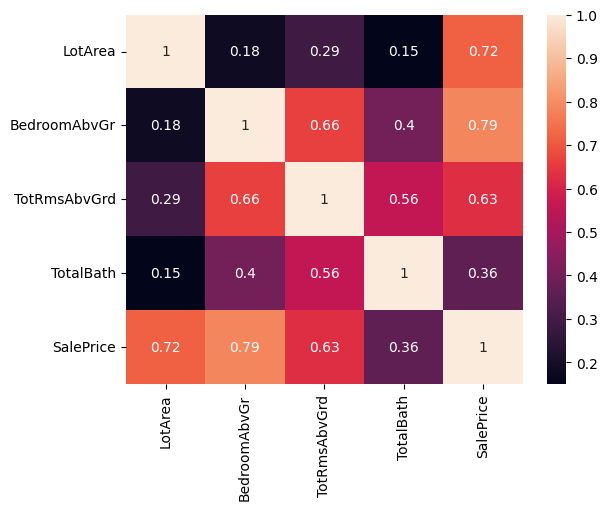

In [257]:
sns.heatmap(dfc.corr(),annot=True)                        #getting correlation heatmap using seaborn

In [258]:
X=dfc.drop("SalePrice",axis=1)                         # independent variables

In [259]:
y=dfc["SalePrice"]                                      # dependent variables

In [260]:
X

,LotArea,BedroomAbvGr,TotRmsAbvGrd,TotalBath
0,11622,2,5,1
1,14267,3,6,2
2,13830,3,6,3
3,9978,3,7,3
4,5005,2,5,2
...,...,...,...,...
1454,1936,3,5,2
1455,1894,3,6,2
1456,20000,4,7,1
1457,10441,3,6,1


In [261]:
y

0       169277.052498
1       187758.393989
2       183583.683570
3       179317.477511
4       150730.079977
            ...      
1454    167081.220949
1455    164788.778231
1456    219222.423400
1457    184924.279659
1458    187741.866657
Name: SalePrice, Length: 1459, dtype: float64

In [262]:
# Train TEst Split

In [263]:
from sklearn.model_selection import train_test_split

In [264]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=34,shuffle=True)

In [265]:
from sklearn.linear_model import LinearRegression

In [266]:
model=LinearRegression()

In [267]:
model.fit(X_train,y_train)                     # model Training

LinearRegression()

In [268]:
model.score(X_test,y_test)                   # getting accuracy of our model

0.9608345875578318

In [269]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [270]:
output=model.predict(X_test)

In [271]:

print((mean_squared_error(y_test,output)**(1/2)))
print(mean_absolute_error(y_test,output))

3341.2746300912813
2759.6994832312757


In [272]:
y_test

427     175127.596216
1448    196526.002999
899     158151.985049
393     156342.717588
581     174026.247295
            ...      
424     178298.791762
45      192429.187346
1086    172532.757661
933     179374.482001
1132    168743.001567
Name: SalePrice, Length: 365, dtype: float64

In [273]:
output

array([181924.99745246, 198567.95838972, 160761.16382413, 156213.95792324,
       176535.6012553 , 175580.15553655, 167623.32817164, 186331.20361998,
       151599.06255279, 176372.324581  , 153665.38816495, 184308.11212595,
       166294.46459958, 179223.03473859, 162133.59669363, 192619.27955248,
       170614.00045664, 208464.1663318 , 177958.2109624 , 199014.20135521,
       163174.86685698, 186897.17235666, 183574.45534531, 198428.89667685,
       156877.63364018, 172688.81708077, 176651.4085834 , 181486.65778309,
       178306.53119974, 189280.20847369, 222449.64051494, 165696.37697102,
       193886.94801148, 169797.32151209, 162523.5058058 , 169588.65223063,
       180686.9991783 , 164548.30117811, 181867.76318462, 209968.97481758,
       189646.19692877, 165425.86253705, 186960.46732376, 187085.0783625 ,
       173837.38363877, 189826.88367081, 166088.26650581, 170851.41702776,
       175926.49535128, 181459.36399664, 183063.50631164, 191972.99550895,
       184697.35496581, 1

In [274]:
y_test

427     175127.596216
1448    196526.002999
899     158151.985049
393     156342.717588
581     174026.247295
            ...      
424     178298.791762
45      192429.187346
1086    172532.757661
933     179374.482001
1132    168743.001567
Name: SalePrice, Length: 365, dtype: float64

In [275]:
y_test

427     175127.596216
1448    196526.002999
899     158151.985049
393     156342.717588
581     174026.247295
            ...      
424     178298.791762
45      192429.187346
1086    172532.757661
933     179374.482001
1132    168743.001567
Name: SalePrice, Length: 365, dtype: float64

In [276]:
type(y_test)

pandas.core.series.Series

In [277]:
output=pd.Series(output)

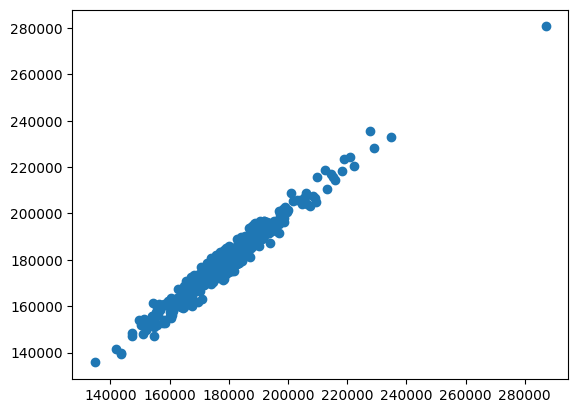

In [282]:
plt.scatter(x=output,y=y_test)             # plotting the predicted and actual values